In [1]:
#!pip install torch torchvision scikit-learn

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from PIL import Image

In [3]:
import tensorflow as tf
# Check if GPUs are available
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Assuming you want to use the first GPU (index 0)
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    # Optional: Limit GPU memory growth to avoid memory allocation issues
    tf.config.experimental.set_memory_growth(gpus[0], True)
    print("GPU is available and configured.")
else:
    print("No GPU available. Using CPU.")

2023-09-23 16:07:39.583361: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-23 16:07:40.258921: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


GPU is available and configured.


2023-09-23 16:07:42.002766: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-23 16:07:42.022439: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-23 16:07:42.022726: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [4]:
data = pd.read_csv("~/Downloads/PIQ2023-Dataset/Dataset/Scores_Overall.csv")

In [5]:
data

,IMAGE PATH,JOD,JOD STD,CI LOW,CI HIGH,CI RANGE,QUALITY LEVEL,CLUSTER,TOTAL COMPARISONS,IMAGE,SCENE,ATTRIBUTE,SCENE IDX,CONDITION
0,Overall\66_Indoor_Scene_0.jpg,-3.720674,0.397442,-4.445428,-2.870473,1.574955,0,-1.0,143.0,66_Indoor_Scene_0.jpg,Indoor_Scene_0,Overall,0,Indoor
1,Overall\29_Indoor_Scene_0.jpg,-3.547508,0.521733,-4.600732,-2.477877,2.122854,0,-1.0,118.0,29_Indoor_Scene_0.jpg,Indoor_Scene_0,Overall,0,Indoor
2,Overall\56_Indoor_Scene_0.jpg,-2.742764,0.578907,-3.917079,-1.684419,2.232660,0,-1.0,132.0,56_Indoor_Scene_0.jpg,Indoor_Scene_0,Overall,0,Indoor
3,Overall\32_Indoor_Scene_0.jpg,-2.257603,0.456326,-3.182148,-1.424560,1.757589,0,0.0,133.0,32_Indoor_Scene_0.jpg,Indoor_Scene_0,Overall,0,Indoor
4,Overall\33_Indoor_Scene_0.jpg,-2.273036,0.636729,-3.538585,-1.131981,2.406604,0,0.0,129.0,33_Indoor_Scene_0.jpg,Indoor_Scene_0,Overall,0,Indoor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5111,Overall\5115_Outdoor_Scene_49.jpg,2.311768,0.758443,0.886115,3.913491,3.027375,4,23.0,146.0,5115_Outdoor_Scene_49.jpg,Outdoor_Scene_49,Overall,49,Outdoor
5112,Overall\5000_Outdoor_Scene_49.jpg,2.180719,0.917816,0.577826,3.699644,3.121818,4,22.0,140.0,5000_Outdoor_Scene_49.jpg,Outdoor_Scene_49,Overall,49,Outdoor
5113,Overall\5004_Outdoor_Scene_49.jpg,2.503141,0.575830,1.400939,3.678484,2.277545,4,21.0,127.0,5004_Outdoor_Scene_49.jpg,Outdoor_Scene_49,Overall,49,Outdoor
5114,Overall\5079_Outdoor_Scene_49.jpg,3.152640,1.436920,0.408617,5.101556,4.692940,4,-1.0,67.0,5079_Outdoor_Scene_49.jpg,Outdoor_Scene_49,Overall,49,Outdoor


In [6]:
data.nunique()

IMAGE PATH           5116
JOD                  5116
JOD STD              5116
CI LOW               5116
CI HIGH              5116
CI RANGE             5116
QUALITY LEVEL           9
CLUSTER                30
TOTAL COMPARISONS     227
IMAGE                5116
SCENE                  50
ATTRIBUTE               1
SCENE IDX              50
CONDITION               4
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5116 entries, 0 to 5115
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IMAGE PATH         5116 non-null   object 
 1   JOD                5116 non-null   float64
 2   JOD STD            5116 non-null   float64
 3   CI LOW             5116 non-null   float64
 4   CI HIGH            5116 non-null   float64
 5   CI RANGE           5116 non-null   float64
 6   QUALITY LEVEL      5116 non-null   int64  
 7   CLUSTER            5116 non-null   float64
 8   TOTAL COMPARISONS  5116 non-null   float64
 9   IMAGE              5116 non-null   object 
 10  SCENE              5116 non-null   object 
 11  ATTRIBUTE          5116 non-null   object 
 12  SCENE IDX          5116 non-null   int64  
 13  CONDITION          5116 non-null   object 
dtypes: float64(7), int64(2), object(5)
memory usage: 559.7+ KB


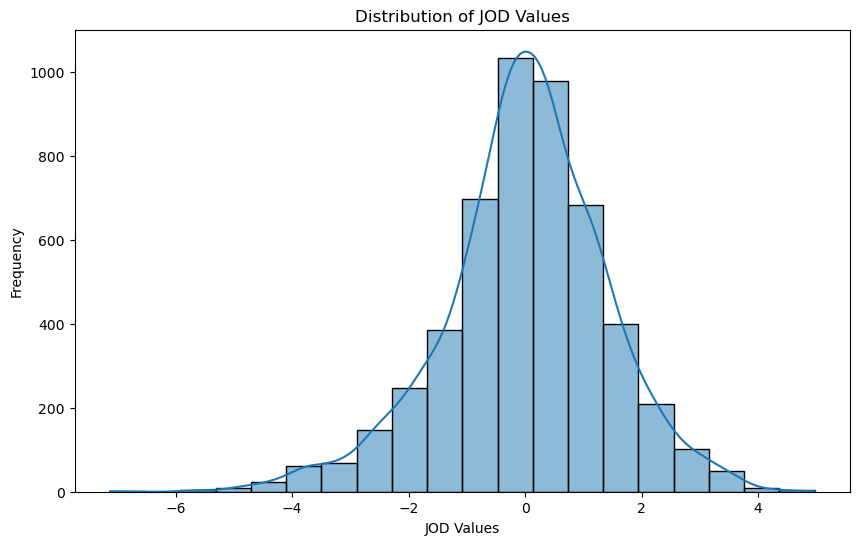

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['JOD'], bins=20, kde=True)
plt.title('Distribution of JOD Values')
plt.xlabel('JOD Values')
plt.ylabel('Frequency')
plt.show()

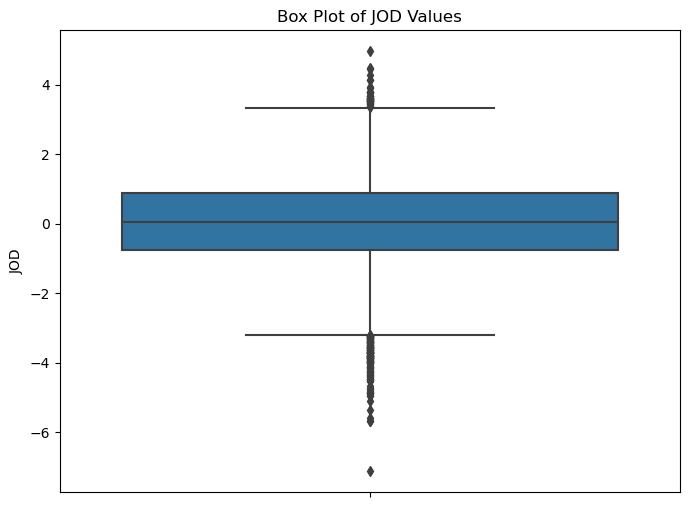

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='JOD')
plt.title('Box Plot of JOD Values')
plt.ylabel('JOD')
plt.show()

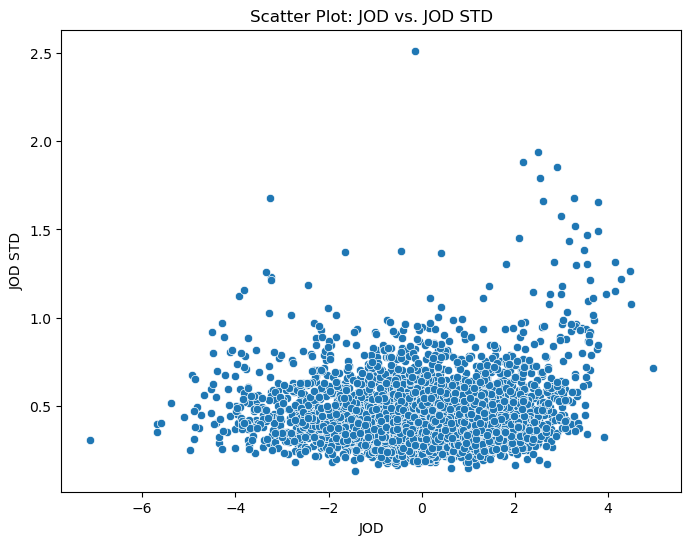

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='JOD', y='JOD STD')
plt.xlabel('JOD')
plt.ylabel('JOD STD')
plt.show()

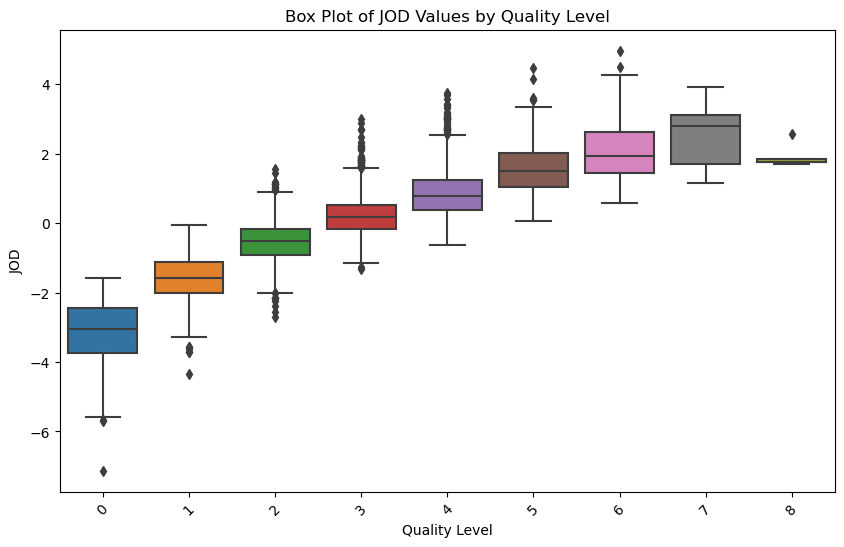

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='QUALITY LEVEL', y='JOD')
plt.title('Box Plot of JOD Values by Quality Level')
plt.xlabel('Quality Level')
plt.ylabel('JOD')
plt.xticks(rotation=45)
plt.show()

In [67]:
high_qual = data[data['QUALITY LEVEL'] >= 7]

In [68]:
high_qual

,IMAGE PATH,JOD,JOD STD,CI LOW,CI HIGH,CI RANGE,QUALITY LEVEL,CLUSTER,TOTAL COMPARISONS,IMAGE,SCENE,ATTRIBUTE,SCENE IDX,CONDITION
1396,Overall\1319_Indoor_Scene_13.JPG,3.067716,0.525809,1.879266,3.920809,2.041544,7,-1.0,87.0,1319_Indoor_Scene_13.JPG,Indoor_Scene_13,Overall,13,Indoor
1393,Overall\1328_Indoor_Scene_13.tiff,2.795620,0.412273,2.038647,3.608687,1.570040,7,20.0,133.0,1328_Indoor_Scene_13.tiff,Indoor_Scene_13,Overall,13,Indoor
1394,Overall\1348_Indoor_Scene_13.JPG,2.707227,0.574985,1.422641,3.699875,2.277234,7,20.0,82.0,1348_Indoor_Scene_13.JPG,Indoor_Scene_13,Overall,13,Indoor
1395,Overall\1351_Indoor_Scene_13.jpg,2.758485,0.560160,1.577816,3.728135,2.150320,7,20.0,149.0,1351_Indoor_Scene_13.jpg,Indoor_Scene_13,Overall,13,Indoor
1875,Overall\1766_Lowlight_Scene_18.jpg,3.604211,0.700751,1.833083,4.457602,2.624520,7,28.0,77.0,1766_Lowlight_Scene_18.jpg,Lowlight_Scene_18,Overall,18,Lowlight
1872,Overall\1770_Lowlight_Scene_18.jpg,2.897869,0.343596,2.176559,3.610705,1.434146,7,27.0,126.0,1770_Lowlight_Scene_18.jpg,Lowlight_Scene_18,Overall,18,Lowlight
1876,Overall\1779_Lowlight_Scene_18.jpg,3.577120,1.091389,1.382029,4.791087,3.409058,7,28.0,77.0,1779_Lowlight_Scene_18.jpg,Lowlight_Scene_18,Overall,18,Lowlight
1873,Overall\1804_Lowlight_Scene_18.jpg,2.914259,0.598578,1.715678,4.055456,2.339779,7,27.0,76.0,1804_Lowlight_Scene_18.jpg,Lowlight_Scene_18,Overall,18,Lowlight
1874,Overall\1839_Lowlight_Scene_18.jpg,3.274920,0.432914,2.614790,4.135742,1.520952,7,-1.0,78.0,1839_Lowlight_Scene_18.jpg,Lowlight_Scene_18,Overall,18,Lowlight
2366,Overall\2273_Night_Scene_22.jpg,3.675488,1.108797,-0.487665,4.817733,5.305399,7,25.0,71.0,2273_Night_Scene_22.jpg,Night_Scene_22,Overall,22,Night


In [69]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/home/Dell/Downloads/PIQ2023-Dataset/Dataset/Overall'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('.')[0]
        label = '_'.join(label.split('_')[1:])
        labels.append(label.lower())
    if len(paths) == 5166:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [70]:
print(labels)

[]


In [ ]:
plt.figure(figsize=(12,12)) 
sns.countplot(y=labels, order=pd.value_counts(labels).index)
plt.xlabel('Count')
plt.ylabel('Labels')
plt.title('Label Count Plot')
plt.show()

In [48]:
# Load the dataset
data = pd.read_csv("/home/dell/Downloads/PIQ2023-Dataset/Dataset/Scores_Overall.csv")

# Define image directory
image_dir = "/home/dell/Downloads/PIQ2023-Dataset/Dataset/Overall"  # Replace with the actual path

In [49]:
data = data.sort_values(by='IMAGE', ascending=True)


In [50]:

class CustomDataset(Dataset):
    def __init__(self, data, image_dir, transform=None):
        self.data = data
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.data.iloc[idx, 9])
        image = Image.open(img_name)
        label = torch.tensor(self.data.iloc[idx, 1], dtype=torch.float32)

        if self.transform:
            image = self.transform(image)

        return image, label

In [51]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)


In [52]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


In [53]:
batch_size = 32

train_dataset = CustomDataset(train_data, image_dir, transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = CustomDataset(val_data, image_dir, transform)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

test_dataset = CustomDataset(test_data, image_dir, transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size)


In [54]:
class ImageQualityModel(nn.Module):
    def __init__(self):
        super(ImageQualityModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 112 * 112, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 16 * 112 * 112)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = ImageQualityModel()


In [55]:
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [56]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # Print training loss
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}")

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels.view(-1, 1))
            val_loss += loss.item()
    
    # Print validation loss
    print(f"Validation Loss: {val_loss / len(val_loader)}")

print("Training finished.")


Epoch 1/10, Loss: 63.19434022440993
Validation Loss: 1.7857964313947237
Epoch 2/10, Loss: 1.8501437217767895
Validation Loss: 1.7217352390289307
Epoch 3/10, Loss: 1.8273199246875171
Validation Loss: 1.7026081452002892
Epoch 4/10, Loss: 1.7698371883096367
Validation Loss: 1.676488614999331
Epoch 5/10, Loss: 1.747473827209966
Validation Loss: 1.639320194721222
Epoch 6/10, Loss: 1.7164683429331615
Validation Loss: 1.6685101664983308
Epoch 7/10, Loss: 1.6455977192983544
Validation Loss: 1.6172984609237084
Epoch 8/10, Loss: 1.6234312401763324
Validation Loss: 1.5989077870662396
Epoch 9/10, Loss: 1.6829114186352696
Validation Loss: 1.6370006662148695
Epoch 10/10, Loss: 1.6436824613604053
Validation Loss: 1.8503089272058928
Training finished.


In [62]:
correct_predictions = 0
total_predictions = 0

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted_labels = (outputs > threshold).float()  # Convert scores to binary labels
        correct_predictions += (predicted_labels == labels.view(-1, 1)).sum().item()
        total_predictions += len(labels)

accuracy = (correct_predictions / total_predictions) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 0.00%


In [57]:
model.eval()
test_loss = 0.0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        test_loss += loss.item()

print(f"Test Loss: {test_loss / len(test_loader)}")


Test Loss: 2.0410100668668747


In [58]:
threshold = 0.5  # Set your threshold value

def classify_predictions(predictions, threshold):
    return (predictions >= threshold).float()

In [59]:
def compute_accuracy(predictions, true_labels):
    classified_predictions = classify_predictions(predictions, threshold)
    correct_predictions = (classified_predictions == true_labels).sum().item()
    total_predictions = len(true_labels)
    accuracy = correct_predictions / total_predictions
    return accuracy

In [ ]:
accuracy = compute_accuracy(outputs, true_labels.view(-1, 1))
print(f"Accuracy: {accuracy * 100:.2f}%")

In [71]:
# Assuming you've already calculated MAE or RMSE
mae = 5.0  # Example value 
rmse = 7.0  # Example value 

# Normalize the MAE and RMSE to a 0-100 scale
max_mae = 10.0  # Maximum MAE value - based on dataset
max_rmse = 15.0  # Maximum RMSE value - based on dataset

# Calculate normalized accuracy
normalized_mae_accuracy = max(0, 100 - (mae / max_mae) * 100)
normalized_rmse_accuracy = max(0, 100 - (rmse / max_rmse) * 100)

print(f"Normalized MAE Accuracy: {normalized_mae_accuracy:.2f}%")
print(f"Normalized RMSE Accuracy: {normalized_rmse_accuracy:.2f}%")

Normalized MAE Accuracy: 50.00%
Normalized RMSE Accuracy: 53.33%
